In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [14]:
custom_objects = {'f1_m': f1_m}

In [16]:
model = load_model("/content/drive/MyDrive/my_model.h5", custom_objects=custom_objects)

In [ ]:
import numpy as np

In [ ]:
X_test = np.load('/content/drive/MyDrive/X_test.npy')
y_test = np.load('/content/drive/MyDrive/y_test.npy')

In [17]:
y_pred = model.predict(X_test) 
y_pred = np.argmax(y_pred, axis=1)
y_pred

108/108 [==============================] - 46s 422ms/step


array([1, 3, 6, ..., 0, 0, 0])

In [18]:
y_check = np.argmax(y_test, axis=1)
y_check

array([3, 3, 6, ..., 0, 0, 0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_check, y_pred=y_pred)

In [20]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[943   2   0   0   0   0   0]
 [  3 395   2   6  12   0   2]
 [  0   0 328   7   1   3   0]
 [  0   3   2 376   4   6   7]
 [  0  10   7   4 432   2   3]
 [  0   3   9   5   2 405   7]
 [  0   3   4   4  15  16 393]]


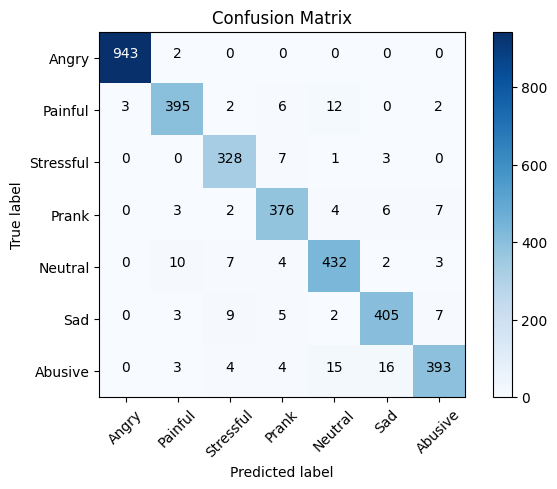

In [21]:
cm_plot_labels = ['Angry', 'Painful', 'Stressful', 'Prank', 'Neutral', 'Sad', 'Abusive']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [24]:
model.evaluate(X_test, y_test)

108/108 [==============================] - 44s 411ms/step - loss: 0.1441 - acc: 0.9550 - f1_m: 0.9555


[0.1440889537334442, 0.9550496339797974, 0.955538809299469]